# Tutorial 2
## Designing two lidar devices and compare against each other

Along [Tutorial 1](file:///C:/Users/fcosta/SWE_LOCAL/Sphinx4Qlunc/_build/Tutorial1.html) we've learnt how to create a lidar device. Let's design two lidar devices and compare them. These devices differ from each other just in the scanner head, so we will build up two optics modules by changing the scanner component.

In [1]:
import pandas as pd
import sys,inspect
from functools import reduce
from operator import getitem
import yaml
import os
import sys
import yaml
!dir

 Volume in drive C has no label.
 Volume Serial Number is 0C54-9785

 Directory of C:\Users\fcosta\SWE_LOCAL\GitHub_Qlunc\Tutorials

15.01.2021  17:19    <DIR>          .
15.01.2021  17:19    <DIR>          ..
15.01.2021  17:15    <DIR>          .ipynb_checkpoints
15.01.2021  17:16            26.574 Tutorial1.ipynb
15.01.2021  17:19            79.636 Tutorial2.ipynb
15.01.2021  14:34             4.343 yaml_inputs_file_1.yml
15.01.2021  17:20             4.351 yaml_inputs_file_2.yml
               4 File(s)        114.904 bytes
               3 Dir(s)  169.831.333.888 bytes free


## Reading data from yaml files
Let's design two different lidar devices. To do so we will read data from two differet yaml files: `yaml_inputs_file_1.yml` and `yaml_inputs_file_2.yml`

In [2]:
# Reading data from .yml files:

# Reading first lidar data and store it into Qlunc_yaml_inputs_1 variable
with open (r'./yaml_inputs_file_1.yml','r') as file:
    Qlunc_yaml_inputs_1={}
    docs = yaml.load_all(file, Loader=yaml.FullLoader)
    for doc in docs:      
        for k, v in doc.items():     
            Qlunc_yaml_inputs_1.setdefault(k,v)

# Reading second lidar data and store it into Qlunc_yaml_inputs_2 variable
with open (r'./yaml_inputs_file_2.yml','r') as file:
    Qlunc_yaml_inputs_2 = {}
    docs = yaml.load_all(file, Loader=yaml.FullLoader)
    for doc in docs:      
        for k, v in doc.items():     
            Qlunc_yaml_inputs_2.setdefault(k,v)

Lets have a look to the data:

In [3]:
Qlunc_yaml_inputs_2

{'Main_directory': '../TestFiles_Qlunc',
 'Components': {'Scanner': {'Name': 'Scanner_Yaml2',
   'Origin': [0, 0, 0],
   'Sample rate': 0,
   'Focus distance': [55],
   'Cone angle': [20],
   'Azimuth': [0, 360, 8],
   'stdv focus distance': 1,
   'stdv Cone angle': 0.6,
   'stdv Azimuth': 0.8,
   'Uncertainty function': 'uopc.UQ_Scanner'},
  'Optical Circulator': {'Name': 'OC_Yaml2',
   'Insertion loss': 2.1,
   'Uncertainty function': 'uopc.UQ_OpticalCirculator'},
  'Optical Amplifier': {'Name': 'OA_Yaml2',
   'Optical amplifier noise figure': '../metadata/NoiseFigure.csv',
   'Optical amplifier gain': 30,
   'Uncertainty function': 'uphc.UQ_Optical_amplifier'},
  'Photodetector': {'Name': 'Photodetector_YAML2',
   'Photodetector BandWidth': 380000000.0,
   'Load resistor': 50,
   'Photodetector efficiency': 0.85,
   'Dark current': 5e-09,
   'Photodetector signalP': 0.001,
   'Power interval': [0, 1000, 0.001],
   'Gain TIA': 5000.0,
   'V Noise TIA': 0.00016,
   'Uncertainty functi

In [4]:
Qlunc_yaml_inputs_1

{'Main_directory': '../TestFiles_Qlunc',
 'Components': {'Scanner': {'Name': 'Scanner_Yaml',
   'Origin': [0, 0, 0],
   'Sample rate': 0,
   'Focus distance': [35],
   'Cone angle': [20],
   'Azimuth': [0, 360, 8],
   'stdv focus distance': 1,
   'stdv Cone angle': 0.6,
   'stdv Azimuth': 0.8,
   'Uncertainty function': 'uopc.UQ_Scanner'},
  'Optical Circulator': {'Name': 'OC_Yaml',
   'Insertion loss': 2.1,
   'Uncertainty function': 'uopc.UQ_OpticalCirculator'},
  'Optical Amplifier': {'Name': 'OA_Yaml',
   'Optical amplifier noise figure': '../metadata/NoiseFigure.csv',
   'Optical amplifier gain': 30,
   'Uncertainty function': 'uphc.UQ_Optical_amplifier'},
  'Photodetector': {'Name': 'Photodetector_YAML',
   'Photodetector BandWidth': 380000000.0,
   'Load resistor': 50,
   'Photodetector efficiency': 0.85,
   'Dark current': 5e-09,
   'Photodetector signalP': 0.001,
   'Power interval': [0, 1000, 0.001],
   'Gain TIA': 5000.0,
   'V Noise TIA': 0.00016,
   'Uncertainty function':

In [5]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is 0C54-9785

 Directory of C:\Users\fcosta\SWE_LOCAL\GitHub_Qlunc\Tutorials

15.01.2021  17:19    <DIR>          .
15.01.2021  17:19    <DIR>          ..
15.01.2021  17:15    <DIR>          .ipynb_checkpoints
15.01.2021  17:16            26.574 Tutorial1.ipynb
15.01.2021  17:19            79.636 Tutorial2.ipynb
15.01.2021  14:34             4.343 yaml_inputs_file_1.yml
15.01.2021  17:20             4.351 yaml_inputs_file_2.yml
               4 File(s)        114.904 bytes
               3 Dir(s)  169.831.333.888 bytes free


## Creating python classes:
We create the python classes by running the Qlunc Core: `Qlunc_Classes.py`. Since both `.yml` files are in the same directory just have to chose where do we want to take the `WorkingExample_Qlunc_Classes.py` path from.

In [6]:
# Execute Qlunc_Classes.py (creating classes for lidar 'objects'):
#exec(open(Qlunc_yaml_inputs_2['Main_directory']+'/WorkingExample_Qlunc_Classes.py').read())  
exec(open('C:/Users/fcosta/SWE_LOCAL/GitHub_Qlunc/TestFiles_Qlunc'+'/WorkingExample_Qlunc_Classes.py').read())

The main directory is taken from the yaml file, as well as the rest of the lidar parameters, including plotting flags which select what we want to plot:


In [7]:
# Pointing accuracy uncertainty
flags.flag_plot_pointing_accuracy_unc    = Qlunc_yaml_inputs_1['Flags']['Pointing accuracy uncertainty']  
# Pattern of measuring points
flags.flag_plot_measuring_points_pattern = Qlunc_yaml_inputs_1['Flags']['Scanning Pattern']
# Photodetector noise: shot noise, dark current noise, thermal noise as a function of the photodetector input signal power.
flags.flag_plot_photodetector_noise      = Qlunc_yaml_inputs_1['Flags']['Photodetector noise']

## Creating scanner heads:
Then is the moment to create a scanner object for each lidar using the different input data parameters

In [8]:
# Instantiating scanner class to create a Scanner virtual-twin:

Scanner1 = scanner(name           = Qlunc_yaml_inputs_1['Components']['Scanner']['Name'],           
               origin            = Qlunc_yaml_inputs_1['Components']['Scanner']['Origin'],         
               sample_rate       = Qlunc_yaml_inputs_1['Components']['Scanner']['Sample rate'],    
               focus_dist        = np.array(Qlunc_yaml_inputs_1['Components']['Scanner']['Focus distance']*int(Qlunc_yaml_inputs_1['Components']['Scanner']['Azimuth'][1]/Qlunc_yaml_inputs_1['Components']['Scanner']['Azimuth'][2])),                                       
               cone_angle        = np.array(Qlunc_yaml_inputs_1['Components']['Scanner']['Cone angle']*int(Qlunc_yaml_inputs_1['Components']['Scanner']['Azimuth'][1]/Qlunc_yaml_inputs_1['Components']['Scanner']['Azimuth'][2])),
               azimuth           = np.array(np.arange(Qlunc_yaml_inputs_1['Components']['Scanner']['Azimuth'][0],
                                                    Qlunc_yaml_inputs_1['Components']['Scanner']['Azimuth'][1],
                                                    Qlunc_yaml_inputs_1['Components']['Scanner']['Azimuth'][2])),                           
               stdv_focus_dist   = Qlunc_yaml_inputs_1['Components']['Scanner']['stdv focus distance'],                
               stdv_cone_angle   = Qlunc_yaml_inputs_1['Components']['Scanner']['stdv Cone angle'],       
               stdv_azimuth      = Qlunc_yaml_inputs_1['Components']['Scanner']['stdv Azimuth'],
               unc_func          = eval(Qlunc_yaml_inputs_1['Components']['Scanner']['Uncertainty function']) ) 


Scanner2 = scanner(name          = Qlunc_yaml_inputs_2['Components']['Scanner']['Name'],           
               origin            = Qlunc_yaml_inputs_2['Components']['Scanner']['Origin'],         
               sample_rate       = Qlunc_yaml_inputs_2['Components']['Scanner']['Sample rate'],    
               focus_dist        = np.array(Qlunc_yaml_inputs_2['Components']['Scanner']['Focus distance']*int(Qlunc_yaml_inputs_2['Components']['Scanner']['Azimuth'][1]/Qlunc_yaml_inputs_2['Components']['Scanner']['Azimuth'][2])),                                       
               cone_angle        = np.array(Qlunc_yaml_inputs_2['Components']['Scanner']['Cone angle']*int(Qlunc_yaml_inputs_2['Components']['Scanner']['Azimuth'][1]/Qlunc_yaml_inputs_2['Components']['Scanner']['Azimuth'][2])),
               azimuth           = np.array(np.arange(Qlunc_yaml_inputs_2['Components']['Scanner']['Azimuth'][0],
                                                    Qlunc_yaml_inputs_2['Components']['Scanner']['Azimuth'][1],
                                                    Qlunc_yaml_inputs_2['Components']['Scanner']['Azimuth'][2])),                           
               stdv_focus_dist   = Qlunc_yaml_inputs_2['Components']['Scanner']['stdv focus distance'],                
               stdv_cone_angle   = Qlunc_yaml_inputs_2['Components']['Scanner']['stdv Cone angle'],       
               stdv_azimuth      = Qlunc_yaml_inputs_2['Components']['Scanner']['stdv Azimuth'],
               unc_func          = eval(Qlunc_yaml_inputs_2['Components']['Scanner']['Uncertainty function']) ) 


Created new scanner: Scanner_Yaml
Created new scanner: Scanner_Yaml2


## Optical circulator:
Once we have created the different scanning heads we can create the optical circulator. Since they use the same optical circulator we just have to create one for both lidars. 

In [9]:
#Optical Circulator:

Optical_circulator = optical_circulator (name           = Qlunc_yaml_inputs_1['Components']['Optical Circulator']['Name'],
                                         insertion_loss = Qlunc_yaml_inputs_1['Components']['Optical Circulator']['Insertion loss'],              
                                         unc_func       = eval(Qlunc_yaml_inputs_1['Components']['Optical Circulator']['Uncertainty function']))  

Created new optical circulator: OC_Yaml


## Optics modules:
Create the optics modules by introducing scanners and optical circulator in them (by instantiating the optics `class`):

In [10]:
# Optics Module lidar1:

Optics_Module1 =  optics (name               = Qlunc_yaml_inputs_1['Modules']['Optics Module']['Name'],     # Introduce your Optics Module name.
                          scanner            = eval(Qlunc_yaml_inputs_1['Modules']['Optics Module']['Scanner']),             # Scanner instance (in this example "Scanner") or "None". "None" means that you don´t want to include Scanner in Optics Module, either in uncertainty calculations.
                          optical_circulator = eval(Qlunc_yaml_inputs_1['Modules']['Optics Module']['Optical circulator']),  # Optical Circulator instance (in this example "Optical_circulator") or "None". "None" means that you don´t want to include Optical circulator in Optics Module, either in uncertainty calculations.
                          laser              = eval(Qlunc_yaml_inputs_1['Modules']['Optics Module']['Laser']),
                          unc_func           = eval(Qlunc_yaml_inputs_1['Modules']['Optics Module']['Uncertainty function']))
# Optics Module lidar2:
Optics_Module2 =  optics (name               = Qlunc_yaml_inputs_2['Modules']['Optics Module']['Name'],     # Introduce your Optics Module name.
                          scanner            = eval(Qlunc_yaml_inputs_2['Modules']['Optics Module']['Scanner']),             # Scanner instance (in this example "Scanner") or "None". "None" means that you don´t want to include Scanner in Optics Module, either in uncertainty calculations.
                          optical_circulator = eval(Qlunc_yaml_inputs_2['Modules']['Optics Module']['Optical circulator']),  # Optical Circulator instance (in this example "Optical_circulator") or "None". "None" means that you don´t want to include Optical circulator in Optics Module, either in uncertainty calculations.
                          laser              = eval(Qlunc_yaml_inputs_2['Modules']['Optics Module']['Laser']),
                          unc_func           = eval(Qlunc_yaml_inputs_2['Modules']['Optics Module']['Uncertainty function']))

Created new optic module: Optics_module_Yaml
Created new optic module: Optics_module_Yaml2


## Photonics:

In [11]:
# Instantiating optical amplifier:

Optical_Amplifier = optical_amplifier(name    = Qlunc_yaml_inputs_1['Components']['Optical Amplifier']['Name'],        # Introduce your scanner name.

                                     OA_NF    = Qlunc_yaml_inputs_1['Components']['Optical Amplifier']['Optical amplifier noise figure'],          # In [dB]. Can introduce it as a table from manufactures (in this example the data is taken from Thorlabs.com, in section EDFA\Graps) or introduce a single well-known value

                                     OA_Gain  = Qlunc_yaml_inputs_1['Components']['Optical Amplifier']['Optical amplifier gain'],                         # In [dB]. (in this example the data is taken from Thorlabs.com, in section EDFA\Specs)

                                     unc_func = eval(Qlunc_yaml_inputs_1['Components']['Optical Amplifier']['Uncertainty function']))  # Function describing Optical Amplifier uncertainty. Further informaion in "UQ_Photonics_Classes.py" comments.


Created new optical amplifier: OA_Yaml


Photodetector digital twin:

In [12]:
# Instantiating Photodetector:

Photodetector    = photodetector(name             = Qlunc_yaml_inputs_1['Components']['Photodetector']['Name'],               # Introduce your photodetector name.

                                 Photo_BandWidth  = Qlunc_yaml_inputs_1['Components']['Photodetector']['Photodetector BandWidth'],                  # In[]. Photodetector bandwidth

                                 Load_Resistor    = Qlunc_yaml_inputs_1['Components']['Photodetector']['Load resistor'],                     # In [ohms]

                                 Photo_efficiency = Qlunc_yaml_inputs_1['Components']['Photodetector']['Photodetector efficiency'],                    # Photodetector efficiency [-]

                                 Dark_Current     = Qlunc_yaml_inputs_1['Components']['Photodetector']['Dark current'],                   #  In [A]. Dark current in the photodetector.

                                 Photo_SignalP    = Qlunc_yaml_inputs_1['Components']['Photodetector']['Photodetector signalP'],

                                 Power_interval   = np.array(np.arange(Qlunc_yaml_inputs_1['Components']['Photodetector']['Power interval'][0],

                                                                       Qlunc_yaml_inputs_1['Components']['Photodetector']['Power interval'][1],

                                                                       Qlunc_yaml_inputs_1['Components']['Photodetector']['Power interval'][2])),#np.arange(Qlunc_yaml_inputs['Components']['Photodetector']['Power interval']), # In [w]. Power interval for the photodetector domain in photodetector SNR plot. 

                                 Gain_TIA         = Qlunc_yaml_inputs_1['Components']['Photodetector']['Gain TIA'],                    # In [dB]. If there is a transimpedance amplifier.

                                 V_Noise_TIA      = Qlunc_yaml_inputs_1['Components']['Photodetector']['V Noise TIA'],                 # In [V]. If there is a transimpedance amplifier.

                                 unc_func         = eval(Qlunc_yaml_inputs_1['Components']['Photodetector']['Uncertainty function']))  # Function describing Photodetector uncertainty. Further informaion in "UQ_Photonics_Classes.py" comments.

Created new photodetector: Photodetector_YAML


Photonics module digital twin:
And finally the Photonics module:


In [13]:
# Instantiating Photonics module:

Photonics_Module = photonics(name              = Qlunc_yaml_inputs_1['Modules']['Photonics Module']['Name'],        # Introduce your Photonics module name

                             photodetector     = eval(Qlunc_yaml_inputs_1['Modules']['Photonics Module']['Photodetector']),             # Photodetector instance (in this example "Photodetector") or "None". "None" means that you don´t want to include photodetector in Photonics Module, either in uncertainty calculations.

                             optical_amplifier = eval(Qlunc_yaml_inputs_1['Modules']['Photonics Module']['Optical amplifier']),         # Scanner instance (in this example "OpticalAmplifier") or "None". "None" means that you don´t want to include Optical Amplifier in Photonics Module, either in uncertainty calculations.

                             unc_func          = eval(Qlunc_yaml_inputs_1['Modules']['Photonics Module']['Uncertainty function']))

Created new photonic module: Photonics_module_Yaml


Lidar general inputs:

In [14]:
# Instantiating lidar general inputs

Lidar_inputs = lidar_gral_inp(name        = Qlunc_yaml_inputs_1['Components']['Lidar general inputs']['Name'],

                              wave        = Qlunc_yaml_inputs_1['Components']['Lidar general inputs']['Wavelength'],

                              sample_rate = Qlunc_yaml_inputs_1['Components']['Lidar general inputs']['Sample rate'],

                              yaw_error   = Qlunc_yaml_inputs_1['Components']['Lidar general inputs']['Yaw error'],                          

                              pitch_error = Qlunc_yaml_inputs_1['Components']['Lidar general inputs']['Pitch error'],                          

                              roll_error  = Qlunc_yaml_inputs_1['Components']['Lidar general inputs']['Roll error'])

Lidar_inputs_2 = lidar_gral_inp(name        = Qlunc_yaml_inputs_2['Components']['Lidar general inputs']['Name'],

                                wave        = Qlunc_yaml_inputs_2['Components']['Lidar general inputs']['Wavelength'],

                                sample_rate = Qlunc_yaml_inputs_2['Components']['Lidar general inputs']['Sample rate'],

                                yaw_error   = Qlunc_yaml_inputs_2['Components']['Lidar general inputs']['Yaw error'],                          

                                pitch_error = Qlunc_yaml_inputs_2['Components']['Lidar general inputs']['Pitch error'],                          

                                roll_error  = Qlunc_yaml_inputs_2['Components']['Lidar general inputs']['Roll error'])                          

Created new lidar general inputs: Lidar_gral_inputs_Yaml
Created new lidar general inputs: Lidar_gral_inputs_Yaml2


Atmospheric scenarios:

We can create different atmospheric scenarios under which the lidar uncertainties are assessed. Thus, single or multiple scenarios can be evaluated either including single or time-seried atmospheric variables values.

In [15]:
# Instantiating atmospheric scenario(s): Assuming both lidars ahve the same atmospheric 
Atmospheric_TimeSeries = Qlunc_yaml_inputs_1['Atmospheric_inputs']['TimeSeries']  
                                                                           
if Atmospheric_TimeSeries:
    Atmos_TS_FILE           = '../metadata/AtmosphericData/'+Qlunc_yaml_inputs_1['Atmospheric_inputs']['Atmos_TS_FILE']
    AtmosphericScenarios_TS = pd.read_csv(Atmos_TS_FILE,delimiter=';',decimal=',')
    Atmospheric_inputs = {
                          'temperature' : list(AtmosphericScenarios_TS.loc[:,'T']),    
                          'humidity'    : list(AtmosphericScenarios_TS.loc[:,'H']),    
                          'rain'        : list(AtmosphericScenarios_TS.loc[:,'rain']),
                          'fog'         : list(AtmosphericScenarios_TS.loc[:,'fog']),
                          'time'        : list(AtmosphericScenarios_TS.loc[:,'t'])     
                          } 
    Atmospheric_Scenario = atmosphere(name        = 'Atmosphere1',
                                      temperature = Atmospheric_inputs['temperature'])
else:    

    Atmospheric_Scenario = atmosphere(name        = 'Atmosphere1',
                                      temperature = Qlunc_yaml_inputs_1['Atmospheric_inputs']['Temperature'])

Created new atmosphere: Atmosphere1


Now we build up the lidar devices by putting all components together:

In [16]:
Lidar_1 = lidar(name         = Qlunc_yaml_inputs_1['Lidar']['Name'],                       # Introduce the name of your lidar device.
                photonics    = eval(Qlunc_yaml_inputs_1['Lidar']['Photonics module']),     # Introduce the name of your photonics module.
                optics       = eval(Qlunc_yaml_inputs_1['Lidar']['Optics module']),        # Introduce the name of your optics module.
                power        = eval(Qlunc_yaml_inputs_1['Lidar']['Power module']),         # Introduce the name of your power module. NOT IMPLEMENTED YET!
                lidar_inputs = eval(Qlunc_yaml_inputs_1['Lidar']['Lidar inputs']),         # Introduce lidar general inputs
                unc_func     = eval(Qlunc_yaml_inputs_1['Lidar']['Uncertainty function'])) # Function estimating lidar global uncertainty

Lidar_2 = lidar(name         = Qlunc_yaml_inputs_2['Lidar']['Name'],                       # Introduce the name of your lidar device.
                photonics    = eval(Qlunc_yaml_inputs_2['Lidar']['Photonics module']),     # Introduce the name of your photonics module.
                optics       = eval(Qlunc_yaml_inputs_2['Lidar']['Optics module']),        # Introduce the name of your optics module.
                power        = eval(Qlunc_yaml_inputs_2['Lidar']['Power module']),         # Introduce the name of your power module. NOT IMPLEMENTED YET!
                lidar_inputs = eval(Qlunc_yaml_inputs_2['Lidar']['Lidar inputs']),         # Introduce lidar general inputs
                unc_func     = eval(Qlunc_yaml_inputs_2['Lidar']['Uncertainty function'])) # Function estimating lidar global uncertainty


Created new lidar device: Caixa1
Created new lidar device: Caixa2


and plot both lidars together:

In [17]:
# Plotting parameters:
plot_param={
            'axes_label_fontsize' : 16,
            'textbox_fontsize'    : 14,
            'title_fontsize'      : 18,
            'suptitle_fontsize'   : 23,
            'legend_fontsize'     : 12,
            'xlim'                : [-25,25],
            'ylim'                : [-25,25],
            'zlim'                : [0,90],
            'markersize'          : 5,
            'markersize_lidar'    : 9,
            'marker'              : '.',
            'markerTheo'          : '.b',
            'tick_labelrotation'  : 45,
            'Qlunc_version'       : 'Qlunc Version - 0.9'
           }

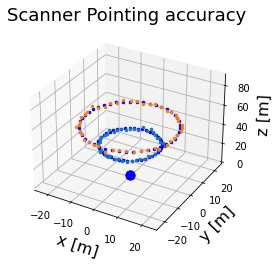

In [18]:
if flags.flag_plot_measuring_points_pattern:
    
    # Calling Scanner uncertainty to plot the graphics
    Scanner_Data1 = Lidar_1.optics.scanner.Uncertainty(Lidar_1,Atmospheric_Scenario,cts) 

    Scanner_Data2 = Lidar_2.optics.scanner.Uncertainty(Lidar_2,Atmospheric_Scenario,cts) 

    
    # Creating the figure and the axes
    fig,axs4 = plt.subplots()  
    axs4=plt.axes(projection='3d')
    
    # Plotting
    
    # First lidar (Lidar_1)
    axs4.plot([Lidar_1.optics.scanner.origin[0]],[Lidar_1.optics.scanner.origin[1]],[Lidar_1.optics.scanner.origin[2]],'ob',label='{} coordinates [{},{},{}]'.format(Lidar_1.LidarID,Lidar_1.optics.scanner.origin[0],Lidar_1.optics.scanner.origin[1],Lidar_1.optics.scanner.origin[2]),markersize=plot_param['markersize_lidar'])
    axs4.plot(Scanner_Data1['MeasPoint_Coordinates'][0],Scanner_Data1['MeasPoint_Coordinates'][1],Scanner_Data1['MeasPoint_Coordinates'][2],plot_param['markerTheo'],markersize=plot_param['markersize'],label='Theoretical measuring point')
    axs4.plot(Scanner_Data1['NoisyMeasPoint_Coordinates'][0],Scanner_Data1['NoisyMeasPoint_Coordinates'][1],Scanner_Data1['NoisyMeasPoint_Coordinates'][2],plot_param['marker'],markersize=plot_param['markersize'],label='Distance error [m] = {0:.3g}$\pm${1:.3g}'.format(np.mean(Scanner_Data1['Simu_Mean_Distance']),np.mean(Scanner_Data1['STDV_Distance'])))
    # Second lidar(Lidar_2)
    axs4.plot([Lidar_2.optics.scanner.origin[0]],[Lidar_2.optics.scanner.origin[1]],[Lidar_2.optics.scanner.origin[2]],'ob',label='{} coordinates [{},{},{}]'.format(Lidar_2.LidarID,Lidar_2.optics.scanner.origin[0],Lidar_2.optics.scanner.origin[1],Lidar_2.optics.scanner.origin[2]),markersize=plot_param['markersize_lidar'])
    axs4.plot(Scanner_Data2['MeasPoint_Coordinates'][0],Scanner_Data2['MeasPoint_Coordinates'][1],Scanner_Data2['MeasPoint_Coordinates'][2],plot_param['markerTheo'],markersize=plot_param['markersize'],label='Theoretical measuring point')
    axs4.plot(Scanner_Data2['NoisyMeasPoint_Coordinates'][0],Scanner_Data2['NoisyMeasPoint_Coordinates'][1],Scanner_Data2['NoisyMeasPoint_Coordinates'][2],plot_param['marker'],markersize=plot_param['markersize'],label='Distance error [m] = {0:.3g}$\pm${1:.3g}'.format(np.mean(Scanner_Data2['Simu_Mean_Distance']),np.mean(Scanner_Data2['STDV_Distance'])))
   
    # Setting labels, legend, title and axes limits:
    axs4.set_xlabel('x [m]',fontsize=plot_param['axes_label_fontsize'])#,orientation=plot_param['tick_labelrotation'])
    axs4.set_ylabel('y [m]',fontsize=plot_param['axes_label_fontsize'])#,orientation=plot_param['tick_labelrotation'])
    axs4.set_zlabel('z [m]',fontsize=plot_param['axes_label_fontsize'])
    axs4.set_title('Scanner Pointing accuracy',fontsize=plot_param['title_fontsize'])
    # axs4.legend()
    axs4.set_xlim3d(plot_param['xlim'][0],plot_param['xlim'][1])
    axs4.set_ylim3d(plot_param['ylim'][0],plot_param['ylim'][1])
    axs4.set_zlim3d(plot_param['zlim'][0],plot_param['zlim'][1])